In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/fashion/data.csv', encoding='utf-8', sep=';')

In [3]:
df.head()

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
0,01.899.12.5102_498134,blouses/01.899.12.5102_498134.jpg,"Eingefasster Saum/Kante, Gerader Saum, Lagenlo...",s.Oliver BLACK LABEL,blouses,red,https://cdn.aboutstatic.com/file/e5fc1a5599fb5...,https://cdn.aboutstatic.com/file/47daae8d9cde4...,Bluse,https://www.aboutyou.de/p/s-oliver-black-label...,short,normal,NaN,unicolors,loose
1,01.899.12.5104_020034,tops/01.899.12.5104_020034.jpg,"Abgesteppter Saum/Kante, Gerader Saum, Knopfle...",s.Oliver BLACK LABEL,tops,white,https://cdn.aboutstatic.com/file/909575c62c77b...,https://cdn.aboutstatic.com/file/ca6204c741bcc...,Bluse,https://www.aboutyou.de/p/s-oliver-black-label...,NaN,NaN,NaN,unicolors,loose
2,01.899.39.3932_020034,tops/01.899.39.3932_020034.jpg,"Jersey, Rundhals-Ausschnitt, Gerader Saum, Tai...",s.Oliver BLACK LABEL,tops,white,https://cdn.aboutstatic.com/file/991b6f7a4a2ac...,https://cdn.aboutstatic.com/file/a302b90d651f3...,Shirt,https://www.aboutyou.de/p/s-oliver-black-label...,NaN,NaN,round,unicolors,tight
3,01.899.39.3932_446834,tops/01.899.39.3932_446834.jpg,"Gerader Saum, Taillierter Schnitt, Unifarben, ...",s.Oliver BLACK LABEL,tops,pink,https://cdn.aboutstatic.com/file/92e6eba47bf36...,https://cdn.aboutstatic.com/file/a2096a4eabb28...,Langarmshirt mit Allover-Struktur,https://www.aboutyou.de/p/s-oliver-black-label...,NaN,NaN,round,unicolors,tight
4,01.899.71.3916_59593034,pants/01.899.71.3916_59593034.jpg,"5-Pocket-Style, Materialmix, Unifarben, Jeans,...",s.Oliver BLACK LABEL,pants,blue,https://cdn.aboutstatic.com/file/7356873b59eab...,https://cdn.aboutstatic.com/file/6e695b4f43c29...,Jeans,https://www.aboutyou.de/p/s-oliver-black-label...,NaN,long,NaN,unicolors,tight


In [4]:
df.describe()

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
count,92220,92220,92220,92220,92220,92220,92220,91960,92220,49598,46649,65733,41100,71966,74022
unique,92220,92220,92220,1089,7,9,91483,91267,40264,48971,4,5,6,6,3
top,EV421CA8P-Q11,dresses/9678518.jpg,"Stehkragen, Gerader Schnitt, Rippstrick, Unifa...",ONLY,pants,blue,https://cdn.aboutstatic.com/file/88c3ad5d2d588...,https://cdn.aboutstatic.com/file/22b10144c6d1a...,Bluse,https://www.aboutyou.de/p/only/printbluse-mit-...,long,normal,round,unicolors,normal
freq,1,1,1,3506,18717,24882,4,3,2720,3,23762,26214,28129,42321,37783


In [5]:
df.neckline.sort_values().unique()

array(['back', 'deep', 'lined', 'round', 'v', 'wide', nan], dtype=object)

In [24]:
for category in df.category.unique():
    ex = df.loc[df.category == category].sample(1)
    print(ex.img_path)

31824    blouses/9879320.jpg
Name: img_path, dtype: object
38826    tops/CE321D0Q7-K11.jpg
Name: img_path, dtype: object
57725    pants/LTB0518001000001.jpg
Name: img_path, dtype: object
3556    knitwear/2NA21J0H5-C11.jpg
Name: img_path, dtype: object
5508    dresses/4026324989582.jpg
Name: img_path, dtype: object
62450    skirts/MI421B02G-G11.jpg
Name: img_path, dtype: object
55121    jackets/KH121U059-N11.jpg
Name: img_path, dtype: object


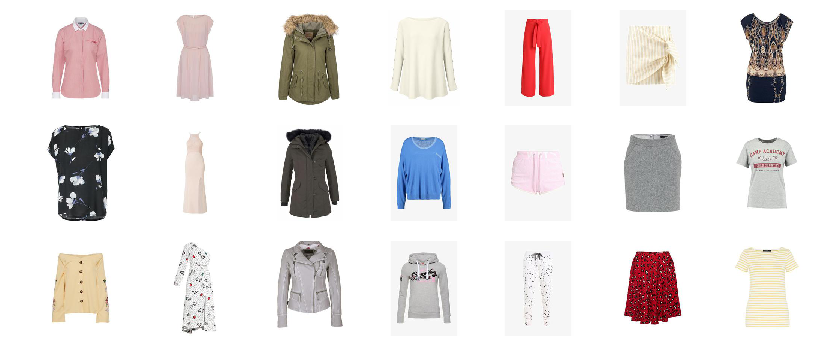

In [75]:
samples = pd.Series()
for s in range(3):
    sample = df.groupby(['category', 'color']).apply(lambda x: x.sample(1)).reset_index(drop=True)
    sample = sample.groupby(['category']).apply(lambda x: x.sample(1)).reset_index(drop=True)
    samples = samples.append(sample.img_path)

fig= plt.figure(figsize=(14,6))

for idx, img_path in enumerate(samples):
    img = Image.open(os.path.join('../../../data/fashion/', img_path))
    ax = fig.add_subplot(3, 7, idx+1)
    ax.axis('off')
    ax.imshow(img)

In [68]:
df.loc[df.id == '4053041226072']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
6540,4053041226072,dresses/4053041226072.jpg,"Breiter Träger, Rundhals-Ausschnitt, Baumwolle...",APART,dresses,black,https://cdn.aboutstatic.com/file/f5b19a6b8e3fc...,https://cdn.aboutstatic.com/file/bb88b0e140df1...,Abendkleid aus Materialmix im two-in-one Look,https://www.aboutyou.de/p/apart/abendkleid-aus...,sleeveless,long,round,floral,normal


In [29]:
df.loc[df.id == '14.709.71.4294_57Z53234']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
749,14.709.71.4294_57Z53234,pants/14.709.71.4294_57Z53234.jpg,"Reißverschluss, 5-Pocket-Style, Gesäßtaschen, ...",s.Oliver RED LABEL,pants,blue,https://cdn.aboutstatic.com/file/a9486406b5062...,https://cdn.aboutstatic.com/file/e827688f51816...,'Shape Slim' Jeans mit Stitching,https://www.aboutyou.de/p/s-oliver-red-label/s...,NaN,long,NaN,unicolors,tight


In [30]:
df.loc[df.id == '60.124722-0043-42']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
16415,60.124722-0043-42,blouses/60.124722-0043-42.jpg,"Keyholeverschluss, Runder Saum, Seitliche Schl...",SEIDENSTICKER,blouses,pink,https://cdn.aboutstatic.com/file/50a751ca5fb04...,https://cdn.aboutstatic.com/file/a035d83cedb6b...,Bluse 'Schwarze Rose',https://www.aboutyou.de/p/seidensticker/bluse-...,NaN,normal,NaN,unicolors,loose


In [31]:
df.loc[df.id == '32GISELLAyellXL']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
4834,32GISELLAyellXL,jackets/32GISELLAyellXL.jpg,"Leder, Bikerjacke, Leicht gefüttert, Druckknop...",Maze,jackets,yellow,https://cdn.aboutstatic.com/file/871b2fd19f5fa...,https://cdn.aboutstatic.com/file/0c04929e3356f...,Lederjacke 'Gisella',https://www.aboutyou.de/p/maze/lederjacke-gise...,NaN,NaN,NaN,unicolors,normal


In [32]:
df.loc[df.id == '9791903']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
25166,9791903,knitwear/9791903.jpg,"Damen Longcardigan von s.Oliver RED LABEL, Bau...",s.Oliver RED LABEL,knitwear,black,https://img.fidcdn.net/r17/product/s-oliver-re...,https://img.fidcdn.net/r17/product/s-oliver-re...,Longcardigan mit Streifenmuster,https://www.fashionid.de/s-oliver-red-label/da...,NaN,NaN,NaN,stripes,NaN


In [33]:
df.loc[df.id == '650669522']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
18700,650669522,skirts/650669522.jpg,"Jersey, Breiter Bund, Taillenbund, Ohne Versch...",MELROSE,skirts,beige,https://cdn.aboutstatic.com/file/502da67d68b80...,https://cdn.aboutstatic.com/file/178f78db35eee...,Minirock,https://www.aboutyou.de/p/melrose/minirock-389...,NaN,short,NaN,NaN,tight


In [34]:
df.loc[df.id == '9557223']

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
21640,9557223,tops/9557223.jpg,"Damen Shirt von HUGO, Viskosemischung mit Stre...",Hugo,tops,white,https://img.fidcdn.net/r17/product/hugo-shirt-...,https://img.fidcdn.net/r17/product/hugo-shirt-...,Dannela 2877 – Shirt mit Dreiviertel-Ärmeln,https://www.fashionid.de/hugo/damen-shirt-mit-...,half,NaN,NaN,NaN,tight


In [37]:
df.loc[(df.category == 'dresses') & (df.pattern == 'floral') & (df.color == 'black') & (df.length == 'long')]

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit
1181,181005902390034,dresses/181005902390034.jpg,"Normaler Träger, Baumwolle, Abgesteppter Saum/...",HALLHUBER,dresses,black,https://cdn.aboutstatic.com/file/500b9f9e380cb...,https://cdn.aboutstatic.com/file/caa12fc7ec652...,Maxikleid,https://www.aboutyou.de/p/hallhuber/maxikleid-...,sleeveless,long,NaN,floral,tight
1360,1DR21C07A-Q11,dresses/1DR21C07A-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Dry Lake,dresses,black,https://mosaic03.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/1...,FIONA - Maxikleid,NaN,half,long,round,floral,tight
6536,4053041224849,dresses/4053041224849.jpg,"Chiffon, Normaler Träger, Rundhals-Ausschnitt,...",APART,dresses,black,https://cdn.aboutstatic.com/file/ff024b90ba160...,https://cdn.aboutstatic.com/file/60b935f8c6365...,Abendkleid mit kurzem Top in A-Linie,https://www.aboutyou.de/p/apart/abendkleid-mit...,sleeveless,long,round,floral,tight
6540,4053041226072,dresses/4053041226072.jpg,"Breiter Träger, Rundhals-Ausschnitt, Baumwolle...",APART,dresses,black,https://cdn.aboutstatic.com/file/f5b19a6b8e3fc...,https://cdn.aboutstatic.com/file/bb88b0e140df1...,Abendkleid aus Materialmix im two-in-one Look,https://www.aboutyou.de/p/apart/abendkleid-aus...,sleeveless,long,round,floral,normal
6594,4053041240313,dresses/4053041240313.jpg,"Jersey, Breiter Träger, V-Ausschnitt, Reißvers...",APART,dresses,black,https://cdn.aboutstatic.com/file/4e19d3508dd39...,https://cdn.aboutstatic.com/file/97a23f6de19fe...,Maxikleid,https://www.aboutyou.de/p/apart/maxikleid-3922797,short,long,v,floral,tight
7751,4058778544796,dresses/4058778544796.jpg,"V-Ausschnitt, Abgesteppter Saum/Kante, Stehkra...",Sandwich,dresses,black,https://cdn.aboutstatic.com/file/ba18287809eb0...,https://cdn.aboutstatic.com/file/9bf5c4ea20be6...,Kleid,https://www.aboutyou.de/p/sandwich/kleid-3903448,long,long,v,floral,normal
9233,4250607909015,dresses/4250607909015.jpg,"Abgesteppter Saum/Kante, Ausgestellter Schnitt...",Nicowa,dresses,black,https://cdn.aboutstatic.com/file/3d08b8b8576cb...,https://cdn.aboutstatic.com/file/7c20a9ccf514a...,Kleid 'ZOE',https://www.aboutyou.de/p/nicowa/kleid-zoe-390...,long,long,NaN,floral,tight
9339,4251250724000,dresses/4251250724000.jpg,"Rundhals-Ausschnitt, Baumwolle, Abgesteppter S...",IVY & OAK,dresses,black,https://cdn.aboutstatic.com/file/ffabd7db3f3b6...,https://cdn.aboutstatic.com/file/2a5c8b823a59b...,Kleid Embroidered Evening Dress,https://www.aboutyou.de/p/ivy-und-oak/kleid-em...,long,long,round,floral,normal
9408,4251250735648,dresses/4251250735648.jpg,"Viskose, Verdeckter Reißverschluss, Geblümt/fl...",IVY & OAK,dresses,black,https://cdn.aboutstatic.com/file/281ccf7195717...,https://cdn.aboutstatic.com/file/0fb726fe71e76...,"Kleid Bohemian Maxi Dress (SS18,Mar)",https://www.aboutyou.de/p/ivy-und-oak/kleid-bo...,half,long,NaN,floral,loose
10534,4BE21C08D-Q11,dresses/4BE21C08D-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Benetton,dresses,black,https://mosaic04.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/4...,MAXI DRESS WITH FLOWERS - Maxikleid,NaN,long,long,v,floral,tight
